# Extracting N2 3' UTR regions from other genomes

# Blasting N2 3' UTR regions to CB4856

### 1) download the CB4856 genome from WormBase FTP site:  
ftp://ftp.wormbase.org/pub/wormbase/species/c_elegans/PRJNA275000/sequence/genomic/

I believe the CB4856 assembly is PRJNA275000. I chose the WS268 unmasked assembly, as we think WS268 matches what is used in CENDR:
`c_elegans.PRJNA275000.WS268.genomic.fa.gz`

### 2) convert the genome sequences into a local blast database. Requires BLAST+ to be installed

In [10]:
wget ftp://ftp.wormbase.org/pub/wormbase/species/c_elegans/PRJNA275000/sequence/genomic/c_elegans.PRJNA275000.WS268.genomic.fa.gz
gunzip /Volumes/users/Corinne_Simonti/projects/RNA/data/c_elegans.PRJNA275000.WS268.genomic.fa.gz

export PATH=/usr/local/ncbi/blast/bin/:$PATH

cd /Volumes/users/Corinne_Simonti/projects/RNA/data/
makeblastdb -in c_elegans.PRJNA275000.WS268.genomic.fa -out "CB4856_WS268_genomic" -taxid 6239 -dbtype nucl -parse_seqids

gzip: ../Genome_seqs/c_elegans.PRJNA275000.WS268.genomic.fa.gz: No such file or directory


Building a new DB, current time: 05/14/2019 14:37:12
New DB name:   /home/ksilliman/Projects/PD_RNAworms/Genome_seqs/CB4856_WS268_genomic
New DB title:  ../Genome_seqs/c_elegans.PRJNA275000.WS268.genomic.fa
Sequence type: Nucleotide
Keep Linkouts: T
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 7 sequences in 0.840637 seconds.


### 3) Download the 3'UTR sequencefrom ParaSite through WomBase, as described on the [WormBase FAQ page](https://www.wormbase.org/about/Frequently_asked_questions).

In [26]:
# Set the variable name for the ParaSite download and the filtered fasta file (N2 genome)
# Change these anytime you download a new file 
prefix = "/Volumes/users/Corinne_Simonti/projects/RNA/data/"

UTR = prefix + "martquery_08142019_WS269-2.txt"
UTRf = prefix + "UTR3_0814_WS269_filt-2.fa"

In [18]:
#%expand
# Unzip 3'UTR download
#gunzip {UTR}.gz

### 4) For some reason, the download includes a lot of sequences that say "Sequence unavailable". These need to be removed.

In [27]:
#%expand
# Remove all sequences that say "Sequence unavailable". Print the total number of sequences.
IN = open(UTR,"r")
OUT = open(UTRf,"w")

n = 0
seq = ""
for line in IN:
    if ">" in line:
        if seq != "":
            OUT.write(header+seq+"\n")
            n += 1
            seq = ""
        header = line
    else:
        if "unavailable" not in line:
            seq = seq + line.strip()
        else:
            seq = ""
            
            
IN.close()
OUT.close()
print(n)

25978


In [20]:
#%expand
head {UTRf}

>WBGene00003525|17486871|17486981|4R79.1a.1
TCTTCTATCTGGTGTTATTTATTTTGTTGCTTATTGTTCCATGACGTGTGTATAATGTAATTCTGAAAGCCAATTTTTTCATTTTTTGAAAATATTTATATAATTTATACT
>WBGene00004098|10383977|10384063|AC3.4.1
ACATCGAATGCGTAACTTTGACATCAGTTCTCTGTATATATGACACAATTTTCTCATTTTTTTCACAATAAATAATAATAATGCTTG
>WBGene00007071|10393357|10393504|AC3.5a.2
ATGAATTTCCATACAATGACAAAAACTATTAGTGACAGATAACATAAACACTTGATTTTATTTATTAATGTGAAACCGGTCAGAGTTCATAATTTTTGTTGTAACTTGTGTTTGCCTCAACATTGAATAAAATGTTTATAAATCGGAC
>WBGene00007072|10397735|10397817|AC3.7.1
TTTTAAAAAGTTTTATTTGCTATCAATTTGTATCTCTTGTTGATTTAATTCATATTTGAGCCTTAATAAACTGTCTAATCTGC
>WBGene00000024|10380340|10380425|AC3.3.1
ACATCGAATGCGTAACTTTGACATCAGTTCTCTGTATATATGACACAATTTTTTTTCTTTTTTTTCACAATAACATTGCTTGAAAT


### 5) Blast N2 3' UTR sequences against the CB4856 genome.
Requires an e-value of < 1e-3, at least 80% coverage of the query sequence, and only the top 3 hits.

In [34]:
## Produces blast results for Hawaii genome.
#%expand
blastn -query UTR3_0814_WS269_filt-2.fa -task megablast -outfmt 10 -word_size 11 -db CB4856_WS268_genomic -out 3UTR_blast.out -num_threads 2 -max_hsps 3 -evalue 1e-3 -qcov_hsp_perc 80

In [1]:
# Look at output of blast
# Columns are: Fasta header,
# aligned chromosome,
# # of identical matches,
# alignment length,
# # of mismatches,
# # of gaps,
# alignment start pos query,
# alignment end pos query,
# alignment start pos in target
# alignment end pos in target
# evalue
# bit score
head -n 20 3UTR_blast.out

WBGene00003525|17486871|17486981|4R79.1a.1,IV,100.00,111,0,0,1,111,17178578,17178468,8e-53,206
WBGene00004098|10383977|10384063|AC3.4.1,V,100.00,87,0,0,1,87,10068540,10068626,1e-39,161
WBGene00004098|10383977|10384063|AC3.4.1,V,91.78,73,4,1,1,73,10064988,10064918,3e-21,100
WBGene00007071|10393357|10393504|AC3.5a.2,V,100.00,148,0,0,1,148,10077922,10078069,3e-73,274
WBGene00007072|10397735|10397817|AC3.7.1,V,100.00,83,0,0,1,83,10082300,10082382,2e-37,154
WBGene00000024|10380340|10380425|AC3.3.1,V,94.52,73,2,1,1,73,10068540,10068610,1e-24,111
WBGene00004964|10385685|10385711|AC3.10.1,V,100.00,27,0,0,1,27,10070248,10070274,3e-07,51.0
WBGene00007063|4664|4717|2L52.1a.1,II,100.00,54,0,0,1,54,4663,4716,1e-21,100
WBGene00007073|10401223|10401307|AC3.8.1,V,98.82,85,1,0,1,85,10085789,10085873,7e-37,152
WBGene00007070|10374208|10374245|AC3.2.1,V,100.00,38,0,0,1,38,10058907,10058944,6e-13,71.3
WBGene00007071|10393357|10393504|AC3.5a.1,V,100.00,148,0,0,1,148,10077922,10078069,3e-73,274
WBGene000070

Some N2 3'UTR loci are aligniing with high confidence to multiple regions of the CB4856 genome. For example, transcript AC3.4.1 aligns to two locations, one alignment with 100% match (evalue 1e-39) and one alignment with 4 mismatches and one gap (evalue 3e-21).  
Another issue: sometimes the retrieved CB4856 sequence is shorter than the N2 3'UTR sequence. E.g., A3.3.1 retrieves a 73nt long sequence from CB4856, but the N2 query sequence is 87 nt. See below. Unsure how to fix this or if it needs fixing.

### Get counts for exact length matches between N2 and Hawaii 3' UTRs.

In [1]:
# imports
import os
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from itertools import cycle
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('max_rows',1000)
import os
import math
from matplotlib.backends.backend_pdf import PdfPages
import scipy
from scipy import stats
import subprocess

In [32]:
prefix = "/Volumes/users/Corinne_Simonti/projects/RNA/data/"

blast = pd.read_csv(prefix + "WS269/3UTR_blast.out")

blast

,WBGene00003525|IV|17486871|17486981|nas-6,IV,100.000,111,0,0.1,1,111.1,17178578,17178468,7.86e-53,206
0,WBGene00004098|V|10383977|10384063|pqn-2,V,100.000,87,0,0,1,87,10068540,10068626,1.250000e-39,161.0
1,WBGene00004098|V|10383977|10384063|pqn-2,V,91.781,73,4,1,1,73,10064988,10064918,2.770000e-21,100.0
2,WBGene00007071|V|10393357|10393504|AC3.5,V,100.000,148,0,0,1,148,10077922,10078069,2.990000e-73,274.0
3,WBGene00007072|V|10397735|10397817|ugt-1,V,100.000,83,0,0,1,83,10082300,10082382,1.970000e-37,154.0
4,WBGene00000024|V|10380340|10380425|abu-1,V,94.521,73,2,1,1,73,10068540,10068610,1.260000e-24,111.0
5,WBGene00004964|V|10385685|10385711|spe-10,V,100.000,27,0,0,1,27,10070248,10070274,3.100000e-07,51.0
6,WBGene00007063|II|4664|4717|2L52.1,II,100.000,54,0,0,1,54,4663,4716,1.390000e-21,100.0
7,WBGene00007073|V|10401223|10401307|ugt-2,V,98.824,85,1,0,1,85,10085789,10085873,7.310000e-37,152.0
8,WBGene00007070|V|10374208|10374245|ugt-49,V,100.000,38,0,0,1,38,10058907,10058944,5.780000e-13,71.3
9,WBGene00007071|V|10393357|10393504|AC3.5,V,100.000,148,0,0,1,148,10077922,10078069,2.990000e-73,274.0


In [61]:
7066980-7066903,7066885-7066646

(77, 239, 195)

In [43]:
# Designate files.
prefix = "/Volumes/users/Corinne_Simonti/projects/RNA/data/"
BLAST_FILE = prefix + "WS269/3UTR_blast.out"

In [44]:
# Set up lists and dictionaries.
gene2match = {}
gene2len = {}
gene2hawaii = {}
gene2n2 = {}
gene2id = {}

In [45]:
# Get numbers of 3' UTRs that are the same length between N2 and Hawaii.
SKIP = 0

for line in open(BLAST_FILE):
    seg = line.split(",")
    N2 = seg[0].split("|")
    ID = N2[0]
    CHR = N2[1]
    if ";" in N2[2]:
        SKIP += 1
        continue
    START = int(N2[2])
    END = int(N2[3])
    GENE = N2[4]
    gene2id[GENE] = ID
    gene2n2[GENE] = [CHR,START,END]
    gene2len[GENE] = abs(END - START) + 1
    CHR2 = seg[1]
    MATCH = float(seg[2])
    LENGTH = int(seg[3])
    MISMATCH = int(seg[4])
    GAP = int(seg[5])
    START2 = int(seg[8])
    END2 = int(seg[9])
    if GENE not in gene2match:
        gene2match[GENE] = [MATCH,LENGTH,MISMATCH,GAP]
        gene2hawaii[GENE] = [CHR2,START2,END2]
    else:
        if MATCH > gene2match[GENE][0]:
            gene2match[GENE] = [MATCH,LENGTH,MISMATCH,GAP]
            gene2hawaii[GENE] = [CHR2,START2,END2]
        elif MATCH == gene2match[GENE][0]:
            if LENGTH > gene2match[GENE][1]:
                gene2match[GENE] = [MATCH,LENGTH,MISMATCH,GAP]
                gene2hawaii[GENE] = [CHR2,START2,END2]
        else:
            continue
            
SKIP

943

Some 3'UTR start and end sites have a semicolon in them. I'm skipping these until I know what to do with them. The lengths are not equivalent between the first start and first end vs second start and second end.

In [46]:
E = 0
DIFF = []
mm2count = {}
g2count = {}

for GENE in gene2match:
    if gene2match[GENE][1] == gene2len[GENE]:
        E += 1
        if gene2match[GENE][2] not in mm2count:
            mm2count[gene2match[GENE][2]] = 0
        mm2count[gene2match[GENE][2]] += 1
        if gene2match[GENE][3] not in g2count:
            g2count[gene2match[GENE][3]] = 0
        g2count[gene2match[GENE][3]] += 1
    else:
        DIFF.append(gene2len[GENE]-gene2match[GENE][1])
        
E, len(gene2match)

(10958, 13262)

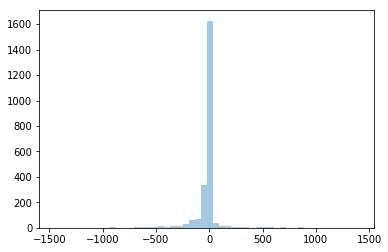

In [69]:
sns.distplot(DIFF, kde=False)

In [70]:
mm2count

{0: 9404,
 1: 1209,
 2: 230,
 3: 61,
 4: 21,
 5: 13,
 6: 9,
 7: 2,
 8: 1,
 9: 4,
 10: 1,
 13: 1,
 14: 1,
 16: 1}

In [71]:
g2count

{0: 10541, 1: 375, 2: 31, 3: 9, 6: 1, 8: 1}

In [47]:
# Write outfile.
prefix1 = "/Volumes/users/Corinne_Simonti/projects/RNA/results/"

outfn = prefix1 + "3UTR_diff_counts.txt"

outfile = open(outfn, 'w')

PREAMBLE = "##File generated by /Users/csimonti3/Documents/GitHub/Celegans_RNAprofiling/Analysis/3UTR_alignment.ipynb.\n"
outfile.write(PREAMBLE)
PREAMBLE1 = "#ID\tGene\tNchr\tN2start\tN2end\tNlength\tHchr\tHstart\tHend\tMatch%\tHLength\tMismatch\tGap\tSame?\n"
outfile.write(PREAMBLE1)

for GENE in gene2match:
    SAME = "False"
    if gene2match[GENE][1] == gene2len[GENE]:
        SAME = "True"
    outfile.write(gene2id[GENE] + "\t" + GENE + "\t" + ('\t').join(str(i) for i in gene2n2[GENE]) + "\t" + 
                  str(gene2len[GENE]) + "\t" + ('\t').join(str(i) for i in gene2hawaii[GENE]) + "\t" + 
                  ('\t').join(str(i) for i in gene2match[GENE]) + "\t" + SAME + "\n")

outfile.close()

In [11]:
diff = pd.read_csv("/Volumes/users/Corinne_Simonti/projects/RNA/results/3UTR_diff_counts.txt", header=1, delim_whitespace = True)

match = diff.loc[diff["Same?"] == True, :]

short = match.loc[match["Nlength"] <= 300, :]

nogap = short.loc[short["Gap"] == 0, :]

shortlist = nogap.loc[nogap["Mismatch"] > 1, :]

shortlist.sort_values("Mismatch", ascending=False)
#.sort_values("Gene")

,#ID,Gene,Nchr,N2start,N2end,Nlength,Hchr,Hstart,Hend,Match%,HLength,Mismatch,Gap,Same?
1964,WBGene00007727,C25F9.8,V,19396479,19396609,131,V,18771758,18771888,92.366,131,10,0,True
8004,WBGene00011207,R10E8.1,V,18242339,18242615,277,V,17688816,17688540,96.751,277,9,0,True
6922,WBGene00003510,mxl-2,III,186951,187021,71,III,159648,159578,87.324,71,9,0,True
8046,WBGene00020386,cyp-34A4,V,3951964,3952097,134,V,3708641,3708774,93.284,134,9,0,True
2076,WBGene00007766,C27C7.1,I,11440443,11440709,267,X,17528957,17528691,97.378,267,7,0,True
11596,WBGene00021041,clp-10,III,35454,35649,196,III,34171,33976,96.939,196,6,0,True
10769,WBGene00022145,Y71G12B.5,I,1805471,1805669,199,I,1772628,1772826,96.985,199,6,0,True
10113,WBGene00020215,T04G9.4,X,775206,775371,166,X,758025,758190,96.988,166,5,0,True
8196,WBGene00269355,T28A11.25,V,3282644,3282704,61,V,3138074,3138134,91.803,61,5,0,True
13112,WBGene00022564,ZC204.14,II,1661806,1661917,112,II,3803795,3803906,95.536,112,5,0,True


In [19]:
print(sys.version)
len(shortlist)

3.6.3 |Anaconda custom (64-bit)| (default, Oct  6 2017, 12:04:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


176

In [35]:
diff.loc[diff["Gene"] == "msp-63", :]

,#ID,Gene,Nchr,N2start,N2end,Nlength,Hchr,Hstart,Hend,Match%,HLength,Mismatch,Gap,Same?
7145,WBGene00003456,msp-63,II,5797036,5797064,29,II,5531387,5531359,93.103,29,2,0,True


'CAAAAGACATAAGATTTTATTGCAAAGTCAAAATTGATAAAGTTCAAAAAATGTTGTAAATACAAAACGGTCATTGGGGTACGTAAACAAAAATCGTTCACGCTTGAAGAAAGAATAATCGGGAACATTTTCAGAAACATTTTTTAAAAAACGTGTTCAAAACAAAATTGAGATCTATCACATAAAATATT'

In [22]:
# Write outfile.
prefix1 = "/Volumes/users/Corinne_Simonti/projects/RNA/results/"

outfn = prefix1 + "3UTR_shortlist_genes.txt"

outfile = open(outfn, 'w')

PREAMBLE = "##File generated by /Users/csimonti3/Documents/GitHub/Celegans_RNAprofiling/Analysis/3UTR_alignment.ipynb.\n"
outfile.write(PREAMBLE)
PREAMBLE1 = "#Gene\n"
outfile.write(PREAMBLE1)

for item in shortlist["Gene"]:
    outfile.write(item + "\n")

outfile.close()

### Extract sequence data.

In [24]:
# how to extract the sequence from Hawaii
blastdbcmd -db CB4856_WS268_genomic -entry 'V' -range 10068540-10068610
blastdbcmd -db CB4856_WS268_genomic -entry 'V' -range 10068540-10068610 | tail -n 1 | wc -c

>lcl|V:10068540-10068610 length=20182852
ACATCGAATGCGTAACTTTGACATCAGTTCTCTGTATATATGACACAATTTTCTCATTTTTTTCACAATAA
72


In [40]:
blastdbcmd -db ../Genome_seqs/CB4856_WS268_genomic -entry 'V' -range 10068540-10068625

>lcl|V:10068540-10068625 length=20182852
ACATCGAATGCGTAACTTTGACATCAGTTCTCTGTATATATGACACAATTTTCTCATTTTTTTCACAATAAATAATAATA
ATGCTT


# 
blastdbcmd -help

 -entry_batch <File_In>
   Input file for batch processing (Format: one entry per line, seq id 
   followed by optional space-delimited specifier(s)
   [range|strand|mask_algo_id]

In [114]:
## Get Hawaii sequence.
result = subprocess.run(['blastdbcmd', '-db', 
                         '/Volumes/users/Corinne_Simonti/projects/RNA/data/WS269/CB4856_WS269_genomic', 
                         '-entry', 'V', '-range', '18771758-18771888'], stdout=subprocess.PIPE)
Hseq = ('').join(str(i) for i in result.stdout.decode('utf-8').split('\n')[1:])
Hseq[130],len(Hseq)

('G', 131)

In [25]:
# N2 genome
%expand
grep "WBGene00000024|10380340|10380425|AC3.3.1" {UTRf} -A 1 
grep "WBGene00000024|10380340|10380425|AC3.3.1" {UTRf} -A 1 | tail -n 1 | wc -c

>WBGene00000024|10380340|10380425|AC3.3.1
ACATCGAATGCGTAACTTTGACATCAGTTCTCTGTATATATGACACAATTTTTTTTCTTTTTTTTCACAATAACATTGCTTGAAAT
87


In [115]:
## Grep from N2 genome.
result = subprocess.run(['grep', 'WBGene00007727|V|19396479|19396609|C25F9.8', 
                         '/Volumes/users/Corinne_Simonti/projects/RNA/data/UTR3_0814_WS269_filt-2.fa', 
                         '-A 1'], stdout=subprocess.PIPE)
Nseq = result.stdout.decode('utf-8').split('\n')[1]
Nseq

'AACCATCTGAATTACTACTCATCAAGCTGGATAGTGAACGGAATCAGAATTATTAATCCATCAGGAGCATGCATGAAACATCCTATGTGGGGATAATAACCAATTTTCATAATAAAGTTGTTAGTTTTGTG'

### Get all sequences.

In [23]:
# Designate files.
N2_FILE = "/Volumes/users/Corinne_Simonti/projects/RNA/data/UTR3_0814_WS269_filt-2.fa"
HAWAII_DB = "/Volumes/users/Corinne_Simonti/projects/RNA/data/WS269/CB4856_WS269_genomic"
DIFF_FILE = "/Volumes/users/Corinne_Simonti/projects/RNA/results/3UTR_diff_counts.txt"

In [29]:
# Set up lists and dictionaries.
gene2id = {}
gene2hrange = {}
gene2n2 = {}
gene2hawaii = {}
gene2strand = {}

FLIP_LIST = []

In [25]:
# Check for Hawaii sequences where the start is after the stop.
for line in open(DIFF_FILE):
    if line[0] == "#":
        continue
    seg = line.split('\t')
    if str(seg[-1]) == "False\n":
        continue
    if int(seg[12]) > 0:
        continue
    if int(seg[11]) < 2:
        continue
    if int(seg[5]) > 400:
        continue
    GENE = str(seg[1])
    RANGE = int(seg[8]) - int(seg[7])
    if RANGE < 0:
        FLIP_LIST.append(GENE)

FLIP_LIST[0:5]

['AH9.3', 'memb-1', 'gly-13', 'tag-52', 'srbc-32']

In [16]:
Hres = subprocess.run(['blastdbcmd', '-db', HAWAII_DB, '-entry', "X", '-range', '2178454-2178644','-strand','minus'], stdout=subprocess.PIPE)
HSEQ = ('').join(str(i) for i in Hres.stdout.decode('utf-8').split('\n')[1:])

HSEQ

'AATATTTTATGTGATAGATCTCAATTTTGTTTTGAACACGTTTTTTAAAAAATGTTTCTGAAAATGTTCCCGATTATTCTTTCTTCAAGCGTGAACGATTTTTGTTTACGTACCCCAATGACCGTTTTGTATTTACAACATTTTTTGAACTTTATCAATTTTGACTTTGCAATAAAATCTTATGTCTTTTG'

In [15]:
Nres = subprocess.run(['grep', "WBGene00014999|X|2259150|2259340|AH9.3", N2_FILE, '-A 1'], stdout=subprocess.PIPE)
NSEQ = Nres.stdout.decode('utf-8').split('\n')[1]

NSEQ

'AATATTCCATGTGATAGATCTCAATTTTGTTTTGAACACGTTTTTTAAAAAATGTTTCTGAAAATGTTCCCGATTATTCTTTCTTCAAGCGTGAACGATTTTTGTTTACGTACCCCAATGACCGTTTTGTATTTACAACATTTTTTGAACTTTATCAATTTTGACTTTGCAATAAAATCTTATGTCTTTTG'

In [30]:
# Get gene info.
for line in open(DIFF_FILE):
    if line[0] == "#":
        continue
    seg = line.split('\t')
    if str(seg[13]) == "False\n":
        continue
    if int(seg[12]) > 0:
        continue
    if int(seg[11]) < 2:
        continue
    if int(seg[5]) > 300:
        continue
    GENE = str(seg[1])
    ID = str(seg[0]) + "|" + str(seg[2]) + "|" + str(seg[3]) + "|" + str(seg[4]) + "|" + GENE
    gene2id[GENE] = ID
    START = str(seg[7])
    END = str(seg[8])
    RAN = int(seg[8]) - int(seg[7])
    if RAN < 0:
        RANGE = END + "-" + START
        gene2strand[GENE] = "minus"
    else:
        RANGE = START + "-" + END
        gene2strand[GENE] = "plus"
    gene2hrange[GENE] = [str(seg[6]),RANGE]

len(gene2hrange)

176

In [31]:
# Extract sequences.
for GENE in gene2id:
    Nres = subprocess.run(['grep', gene2id[GENE], N2_FILE, '-A 1'], stdout=subprocess.PIPE)
    NSEQ = Nres.stdout.decode('utf-8').split('\n')[1]
    gene2n2[GENE] = NSEQ
    Hres = subprocess.run(['blastdbcmd', '-db', HAWAII_DB, '-entry', gene2hrange[GENE][0], 
                           '-range', gene2hrange[GENE][1], '-strand', gene2strand[GENE]], stdout=subprocess.PIPE)
    HSEQ = ('').join(str(i) for i in Hres.stdout.decode('utf-8').split('\n')[1:])
    gene2hawaii[GENE] = HSEQ
    

In [32]:
# Write outfile.
prefix1 = "/Volumes/users/Corinne_Simonti/projects/RNA/results/"

outfn = prefix1 + "3UTR_slg_seqs.txt"

outfile = open(outfn, 'w')

PREAMBLE = "##File generated by /Users/csimonti3/Documents/GitHub/Celegans_RNAprofiling/Analysis/3UTR_alignment.ipynb.\n"
outfile.write(PREAMBLE)
PREAMBLE1 = "#N2ID\tN2seq\tHseq\n"
outfile.write(PREAMBLE1)

for GENE in gene2id:
    outfile.write(gene2id[GENE] + "\t" + gene2n2[GENE] + "\t" + gene2hawaii[GENE] + "\n")

outfile.close()

In [39]:
%expand
blastn -query {UTRf} -task megablast -word_size 11 \
-db ../Genome_seqs/CB4856_WS268_genomic -out 3UTR_blastalign.out \
-num_threads 2 -max_hsps 3 -evalue 1e-3 -qcov_hsp_perc 80

In [118]:
# 0 indexed.
i = 0
while i < len(Nseq):
    if Nseq[i] == Hseq[i]:
        i += 1
        continue
    print(i,Nseq[i],Hseq[i])
    i += 1


5 T A
9 A C
10 A T
11 T C
35 G A
88 G T
92 A G
99 C A
119 G T
122 A C


In [38]:
# Files
GENE_FILE = "/Volumes/users/Corinne_Simonti/projects/RNA/results/3UTR_diff_counts.txt"
SLG_FILE = "/Volumes/users/Corinne_Simonti/projects/RNA/results/3UTR_slg_seqs.txt"
LET7_FILE = "/Volumes/users/Corinne_Simonti/projects/RNA/data/let7_all_targetscan_geneID.txt"
LIN4_FILE = "/Volumes/users/Corinne_Simonti/projects/RNA/data/lin4_all_targetscan_geneID.txt"

# Lists and dictionaries.
LET7_LIST = []
LIN4_LIST = []
LET7_LISTs = []
LIN4_LISTs = []
LET7_LISTd = []
LIN4_LISTd = []

# Get info for genes affected.
for line in open(LET7_FILE):
    GENE = line.rstrip('\n')
    result = subprocess.run(['grep', GENE + "|", SLG_FILE], stdout=subprocess.PIPE)
    newline = result.stdout.decode('utf-8')
    if newline == '':
        continue
    LET7_LIST.append(GENE)    
    LET7_LISTs.append(newline)
    

for GENE in LET7_LIST:
    result = subprocess.run(['grep', GENE + "\t", GENE_FILE], stdout=subprocess.PIPE)
    newline = result.stdout.decode('utf-8')
    if newline == '':
        continue
    LET7_LISTd.append(newline)
    


for line in open(LIN4_FILE):
    GENE = line.rstrip('\n')
    result = subprocess.run(['grep', GENE + "|", SLG_FILE], stdout=subprocess.PIPE)
    newline = result.stdout.decode('utf-8')
    if newline == '':
        continue
    LIN4_LIST.append(GENE)
    LIN4_LISTs.append(newline)
    

for GENE in LIN4_LIST:
    result = subprocess.run(['grep', GENE + "\t", GENE_FILE], stdout=subprocess.PIPE)
    newline = result.stdout.decode('utf-8')
    if newline == '':
        continue
    LIN4_LISTd.append(newline)
    


len(LET7_LIST),len(LIN4_LIST)

(4, 2)

In [34]:
# Write outfile.
prefix1 = "/Volumes/users/Corinne_Simonti/projects/RNA/results/"

outfn = prefix1 + "3UTR_slg_seqs_let7-lin4.txt"

outfile = open(outfn, 'w')

PREAMBLE = "##File generated by /Users/csimonti3/Documents/GitHub/Celegans_RNAprofiling/Analysis/3UTR_alignment.ipynb.\n"
outfile.write(PREAMBLE)
PREAMBLE1 = "#miRNA\tN2ID\tN2seq\tHseq\n"
outfile.write(PREAMBLE1)

for item in LET7_LISTs:
    outfile.write("let-7" + "\t" + item)
    
for item in LIN4_LISTs:
    outfile.write("lin-4" + "\t" + item)

outfile.close()

In [39]:
# Write outfile.
prefix1 = "/Volumes/users/Corinne_Simonti/projects/RNA/results/"

outfn = prefix1 + "3UTR_diff_let7-lin4.txt"

outfile = open(outfn, 'w')

PREAMBLE = "##File generated by /Users/csimonti3/Documents/GitHub/Celegans_RNAprofiling/Analysis/3UTR_alignment.ipynb.\n"
outfile.write(PREAMBLE)
PREAMBLE1 = "#miRNA\tID\tGene\tNchr\tN2start\tN2end\tNlength\tHchr\tHstart\tHend\tMatch%\tHLength\tMismatch\tGap\tSame?\n"
outfile.write(PREAMBLE1)

for item in LET7_LISTd:
    outfile.write("let-7" + "\t" + item)
    
for item in LIN4_LISTd:
    outfile.write("lin-4" + "\t" + item)

outfile.close()

In [43]:
# Files.
SLG_FILE = "/Volumes/users/Corinne_Simonti/projects/RNA/results/3UTR_slg_seqs_let7-lin4.txt"

# Designate lists and dictionaries.
id2gene = {}
gene2id = {}
gene2n2 = {}
gene2hawaii = {}

# Get sequences.
for line in open(SLG_FILE):
    if line[0] == "#":
        continue
    seg = line.split('\t')
    miRNA = seg[0]
    NAME = seg[1].split('|')
    ID = NAME[0]
    GENE = NAME[-1]
    gene2id[GENE] = ID
    id2gene[ID] = GENE
    N2 = seg[2]
    gene2n2[GENE] = N2
    HAW = seg[-1].rstrip('\n')
    gene2hawaii[GENE] = HAW
    
GENE

'srp-1'

In [54]:
# Get differences.
# 0 indexed.
GENE = "srp-1"

NSEQ = gene2n2[GENE]
HSEQ = gene2hawaii[GENE]

print(len(NSEQ))
print(NSEQ[112:118])

i = 0
while i < len(NSEQ):
    if NSEQ[i] == HSEQ[i]:
        i += 1
        continue
    print(i,NSEQ[i],HSEQ[i])
    i += 1


141
TCAGGG
18 G A
33 G T


# Using CENDR data

In [1]:
gunzip ../Genome_seqs/c_elegans.PRJNA13758.WS269.annotations.gff3.gz

In [2]:
awk 'BEGIN {FS="\t";OFS="\t"} {if($9 ~ "CB4856") print}' ../Genome_seqs/c_elegans.PRJNA13758.WS269.annotations.gff3 > WS269_Hawaiian_GFF3_lines.txt

In [3]:
head WS269_Hawaiian_GFF3_lines.txt

I	Variation_project_Polymorphism	SNP	1222	1222	.	+	.	variation=WBVar00146751;public_name=WBVar00146751;other_name=haw1,cewivar00160085;strain=CB4856;polymorphism=1;substitution=A/C
I	Variation_project_Polymorphism	complex_substitution	1369	1388	.	+	.	variation=WBVar02088481;public_name=WBVar02088481;other_name=cewivar00818301;strain=CB4856;polymorphism=1;insertion=CTTATTATTGATGTCAAAGAAGC
I	Variation_project_Polymorphism	SNP	1713	1713	.	+	.	variation=WBVar01273539;public_name=WBVar01273539;other_name=cewivar00160086;strain=CB4856;polymorphism=1;substitution=T/G
I	Variation_project_Polymorphism	SNP	1933	1933	.	+	.	variation=WBVar01529474;public_name=WBVar01529474;other_name=cewivar00065822;strain=AB3,CB4853,CB4854,CB4856,ED3021,ED3040,ED3042,ED3049,JU263,JU300,JU312,JU322,JU345,JU361,JU397,JU775,JU1088,JU1171,JU1401,JU1652,KR314,LKC34,MY2,MY14,MY16,PX174;polymorphism=1;substitution=C/G
I	Variation_project_Polymorphism	insertion_site	1943	1943	.	+	.	variation=WBVar01955456;public_name=WBV

In [4]:
head UTR3_3417_WS269_filt.fa

>WBGene00003525|17486871|17486981|4R79.1a.1
TCTTCTATCTGGTGTTATTTATTTTGTTGCTTATTGTTCCATGACGTGTGTATAATGTAATTCTGAAAGCCAATTTTTTCATTTTTTGAAAATATTTATATAATTTATACT
>WBGene00004098|10383977|10384063|AC3.4.1
ACATCGAATGCGTAACTTTGACATCAGTTCTCTGTATATATGACACAATTTTCTCATTTTTTTCACAATAAATAATAATAATGCTTG
>WBGene00007071|10393357|10393504|AC3.5a.2
ATGAATTTCCATACAATGACAAAAACTATTAGTGACAGATAACATAAACACTTGATTTTATTTATTAATGTGAAACCGGTCAGAGTTCATAATTTTTGTTGTAACTTGTGTTTGCCTCAACATTGAATAAAATGTTTATAAATCGGAC
>WBGene00007072|10397735|10397817|AC3.7.1
TTTTAAAAAGTTTTATTTGCTATCAATTTGTATCTCTTGTTGATTTAATTCATATTTGAGCCTTAATAAACTGTCTAATCTGC
>WBGene00000024|10380340|10380425|AC3.3.1
ACATCGAATGCGTAACTTTGACATCAGTTCTCTGTATATATGACACAATTTTTTTTCTTTTTTTTCACAATAACATTGCTTGAAAT


In [26]:
gunzip ../Genome_seqs/c_elegans.PRJNA275000.WS268.annotations.gff3.gz

In [41]:
grep "AC3.3" ../Genome_seqs/c_elegans.PRJNA275000.WS268.annotations.gff3

V	celegans_proteins-BLASTX	protein_match	10064992	10066215	2303	-	.	ID=wormpepx.5024800;Name=AC3.3;Target=AC3.3 10064992 10066215;Gap=M1224 
V	celegans_proteins-BLASTX	protein_match	10066262	10066348	78	-	.	ID=wormpepx.5024666;Name=AC3.3;Target=AC3.3 10066262 10066348;Gap=M87 
V	celegans_proteins-BLASTX	protein_match	4879688	4879795	44	+	.	ID=wormpepx.5073131;Name=AC3.3;Target=AC3.3 4879688 4879795;Gap=M108 
V	celegans_proteins-BLASTX	protein_match	8877326	8877379	40	+	.	ID=wormpepx.3259547;Name=AC3.3;Target=AC3.3 8877326 8877379;Gap=M54 
V	celegans_proteins-BLASTX	protein_match	10067313	10068536	2295	+	.	ID=wormpepx.5024569;Name=AC3.3;Target=AC3.3 10067313 10068536;Gap=M1224 
X	celegans_proteins-BLASTX	protein_match	3709067	3709129	40	-	.	ID=wormpepx.4578565;Name=AC3.3;Target=AC3.3 3709067 3709129;Gap=M63 
IV	celegans_proteins-BLASTX	protein_match	15060362	15061561	1944	-	.	ID=wormpepx.2337780;Name=AC3.3;Target=AC3.3 15060362 15061561;Gap=M81 I6 M222 D3 M201 I6 M429 I9 M264 
IV	celega

In [34]:
gunzip ../Genome_seqs/File_S1_Celegans_N2_to_CB4856_lastz_alignment.txt.gz

In [38]:
head -n 20 ../Genome_seqs/File_S1_Celegans_N2_to_CB4856_lastz_alignment.txt

#Thompson et al.
#File S1 LastZ alignments between C. elegans N2 (WS230) and CB4856
# If the coordinate is not found in this file, then that region was
# not aligned by lastZ.
#Column 1: Chromosome
#Column 2: C. elegans N2 WS230 base
#Column 3: C. elegans N2 WS230 coordinate
#Column 4: C. elegans CB4856 base
#Column 5: C. elegans CB4856 coordinate

CeI G 1 G 1
CeI C 2 C 2
CeI C 3 C 3
CeI T 4 T 4
CeI A 5 A 5
CeI A 6 A 6
CeI G 7 G 7
CeI C 8 C 8
CeI C 9 C 9
CeI T 10 T 10
